In [128]:
## Importing neccessary libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [129]:
#Loading the train dataset
df_train = pd.read_csv("train_cab.csv")

In [130]:
#Load the first 10 rows of data
print(df_train.head(10))

   fare_amount          pickup_datetime  pickup_longitude  pickup_latitude  \
0          4.5  2009-06-15 17:26:21 UTC        -73.844311        40.721319   
1         16.9  2010-01-05 16:52:16 UTC        -74.016048        40.711303   
2          5.7  2011-08-18 00:35:00 UTC        -73.982738        40.761270   
3          7.7  2012-04-21 04:30:42 UTC        -73.987130        40.733143   
4          5.3  2010-03-09 07:51:00 UTC        -73.968095        40.768008   
5         12.1  2011-01-06 09:50:45 UTC        -74.000964        40.731630   
6          7.5  2012-11-20 20:35:00 UTC        -73.980002        40.751662   
7         16.5  2012-01-04 17:22:00 UTC        -73.951300        40.774138   
8          NaN  2012-12-03 13:10:00 UTC        -74.006462        40.726713   
9          8.9  2009-09-02 01:11:00 UTC        -73.980658        40.733873   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.841610         40.712278              1.0  
1         -73.979268     

In [131]:
#Data type of each variable
print(df_train.dtypes)

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object


In [132]:
#Converting the fare amount column into numeric data form

df_train['fare_amount'] = pd.to_numeric(df_train["fare_amount"],errors="coerce")
print(df_train.dtypes)

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object


In [133]:
#Description of dataset
print(df_train.describe())

        fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  16042.000000      16066.000000     16066.000000       16066.000000   
mean      15.041092        -72.462693        39.914675         -72.462233   
std      430.473413         10.578707         6.826797          10.575384   
min       -3.000000        -74.438233       -74.006893         -74.429332   
25%        6.000000        -73.992156        40.734935         -73.991182   
50%        8.500000        -73.981697        40.752605         -73.980170   
75%       12.500000        -73.966837        40.767381         -73.963642   
max    54343.000000         40.766125       401.083332          40.802437   

       dropoff_latitude  passenger_count  
count      16066.000000     16011.000000  
mean          39.897852         2.625171  
std            6.187276        60.846021  
min          -74.006377         0.000000  
25%           40.734647         1.000000  
50%           40.753566         1.000000  
75%  

## Missing Value Analysis

In [134]:
#Calcualte total no. of null values in train data
missing_val = pd.DataFrame(df_train.isnull().sum())
print(missing_val)

                    0
fare_amount        24
pickup_datetime     0
pickup_longitude    0
pickup_latitude     0
dropoff_longitude   0
dropoff_latitude    0
passenger_count    55


In [135]:
#Calcuating percentage of missing values in given dataset
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns={'index':'variables',0:'missing Value'})
missing_val['missing_percentage'] = (missing_val['missing Value']/len(df_train))*100
missing_val = missing_val.sort_values('missing_percentage',ascending=False).reset_index(drop=True)

In [136]:
print(missing_val)

           variables  missing Value  missing_percentage
0    passenger_count             55            0.342338
1        fare_amount             24            0.149384
2    pickup_datetime              0            0.000000
3   pickup_longitude              0            0.000000
4    pickup_latitude              0            0.000000
5  dropoff_longitude              0            0.000000
6   dropoff_latitude              0            0.000000


In [137]:
#Remove a value from table and impute missing value using following method
## Fare amount
#Actual Value = 8
#Mean = 15.04
#Median = 8.5

##Passenger Count
#Actual Value = 1
#Mean = 2.62
#Median = 1

df_train['fare_amount'].loc[160] = np.nan
df_train['passenger_count'].loc[160] = np.nan


C:\Users\amolp\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpu\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [138]:
print(df_train['fare_amount'].loc[160])
print(df_train['passenger_count'].loc[160])

nan
nan


In [139]:
df_train['fare_amount'] = df_train['fare_amount'].fillna((df_train['fare_amount']).mean())
df_train['passenger_count'] = df_train['passenger_count'].fillna((df_train['passenger_count']).mean())

In [140]:
print(df_train['fare_amount'].loc[160])
print(df_train['passenger_count'].loc[160])

15.041531076616172
2.6252729544034974


In [141]:
df_train['fare_amount'] = df_train['fare_amount'].fillna((df_train['fare_amount']).median())
df_train['passenger_count'] = df_train['passenger_count'].fillna((df_train['passenger_count']).median())

In [142]:
print(df_train['fare_amount'].loc[160])
print(df_train['passenger_count'].loc[160])

15.041531076616172
2.6252729544034974


In [143]:
#Calcualte total no. of null values in train data after missing value analysis
missing_val = pd.DataFrame(df_train.isnull().sum())
print(missing_val)

                   0
fare_amount        0
pickup_datetime    0
pickup_longitude   0
pickup_latitude    0
dropoff_longitude  0
dropoff_latitude   0
passenger_count    0


In [144]:
## Setting limit for variables

#Originally, Latitudes range from -90 to 90.
#Originally, Longitudes range from -180 to 180.
#But our data is purely negative Longitudes and purely positive latitudes
#lets align our data in its respective minimum and maximum Longitudes 
#and latitudes values, also removing fare amount,passenger count those are negative and above optimum level.

df_train = df_train[((df_train['pickup_longitude'] > -79) & (df_train['pickup_longitude'] < -70)) & 
           ((df_train['dropoff_longitude'] > -79) & (df_train['dropoff_longitude'] < -70)) & 
           ((df_train['pickup_latitude'] > 36) & (df_train['pickup_latitude'] < 45)) & 
           ((df_train['dropoff_latitude'] > 36) & (df_train['dropoff_latitude'] < 45)) & 
           ((df_train['passenger_count'] > 0) & (df_train['passenger_count'] < 7))  &
           ((df_train['fare_amount'] > 0)& (df_train['fare_amount'] < 1000))]
    


In [145]:
#our dataset contains Datetime stamp value.we will split this data into individual columns for ease of data processing
def date_time_split(df):
    df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"],format='%Y-%m-%d %H:%M:%S UTC')
    df['year'] = df.pickup_datetime.dt.year
    df['month'] = df.pickup_datetime.dt.month
    df['day'] =  df.pickup_datetime.dt.day
    df['weekday'] = df.pickup_datetime.dt.weekday
    df['hour'] = df.pickup_datetime.dt.hour
    return df['pickup_datetime']
    '''
    Weekday
    0 = Monday
    1 = Tuesday
    2 = "Wednesday", 
    3= "Thursday", 
    4= "Friday", 
    5= "Saturday", 
    6= "Sunday" 
    '''
print(df_train.head())

   fare_amount          pickup_datetime  pickup_longitude  pickup_latitude  \
0          4.5  2009-06-15 17:26:21 UTC        -73.844311        40.721319   
1         16.9  2010-01-05 16:52:16 UTC        -74.016048        40.711303   
2          5.7  2011-08-18 00:35:00 UTC        -73.982738        40.761270   
3          7.7  2012-04-21 04:30:42 UTC        -73.987130        40.733143   
4          5.3  2010-03-09 07:51:00 UTC        -73.968095        40.768008   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.841610         40.712278              1.0  
1         -73.979268         40.782004              1.0  
2         -73.991242         40.750562              2.0  
3         -73.991567         40.758092              1.0  
4         -73.956655         40.783762              1.0  


In [146]:
date_time_split(df_train)
#we remove datetime variable 
df_train.drop('pickup_datetime',axis=1,inplace=True)

In [147]:
# Checking NA in data for new dataset
#Calcualte total no. of null values in train data
missing_val = pd.DataFrame(df_train.isnull().sum())
print(missing_val)


                   0
fare_amount        0
pickup_longitude   0
pickup_latitude    0
dropoff_longitude  0
dropoff_latitude   0
passenger_count    0
year               0
month              0
day                0
weekday            0
hour               0


In [148]:
#Setting proper datatypes for each variables
print(df_train.dtypes)

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
year                   int64
month                  int64
day                    int64
weekday                int64
hour                   int64
dtype: object


In [149]:
df_train['passenger_count'] = df_train['passenger_count'].astype(int)

In [150]:
print(df_train.dtypes)

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int32
year                   int64
month                  int64
day                    int64
weekday                int64
hour                   int64
dtype: object


## Outlier Analysis

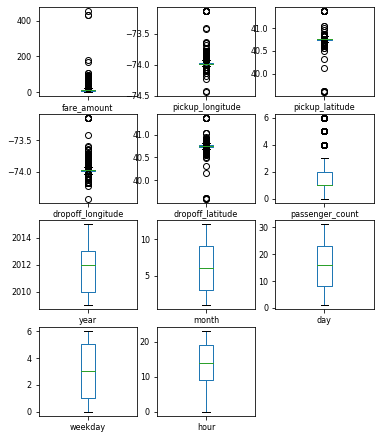

In [151]:
#Using Boxplot we visualize the outliers present in the data
df_train.plot(kind='box',subplots=True, layout=(8,3),sharex=False,sharey=False,fontsize=8)
plt.subplots_adjust(left=0.125,bottom=0.1,top=3,right=0.9,wspace=0.2,hspace=0.2)
plt.show()

In [152]:
#Detecting outlier and deleting values from data

def detect_outlier(df):
    for i in df.columns:
        print(i)
        q75,q25 = np.percentile(df.loc[:,i],[75,25])
        iqr = q75-q25
        
        min = q25-(iqr*1.5)
        max = q75+(iqr*1.5)
        print(min)
        print(max)
        df = df.drop(df[df.loc[:,i] < min].index)
        df = df.drop(df[df.loc[:,i] > max].index)
    return df   

In [153]:
df_train = detect_outlier(df_train)

fare_amount
-3.75
22.25
pickup_longitude
-74.02676637500002
-73.93578137499998
pickup_latitude
40.693342505000004
40.81101182500001
dropoff_longitude
-74.025747225
-73.93542046500002
dropoff_latitude
40.69409108750001
40.811402947499985
passenger_count
-0.5
3.5
year
2005.5
2017.5
month
-6.0
18.0
day
-14.5
45.5
weekday
-5.0
11.0
hour
-6.0
34.0


In [154]:
df_train.shape

(11816, 11)

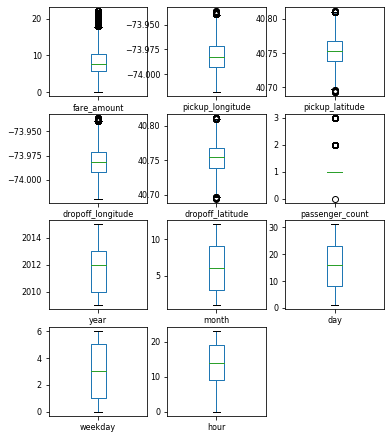

In [155]:
df_train.plot(kind='box',subplots=True, layout=(8,3),sharex=False,sharey=False,fontsize=8)
plt.subplots_adjust(left=0.125,bottom=0.1,top=3,right=0.9,wspace=0.2,hspace=0.2)
plt.show()

## Data Visualisation

Text(0, 0.5, 'frequency')

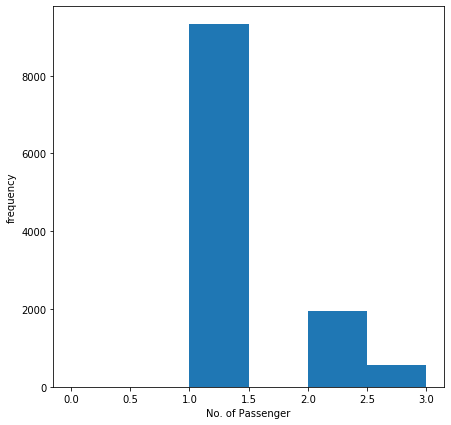

In [156]:
#Histogram plot of passaenger_count column

plt.figure(figsize=(7,7))
plt.hist(df_train['passenger_count'],bins=6)
plt.xlabel("No. of Passenger")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

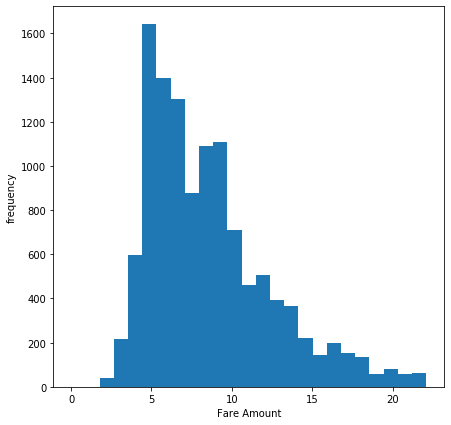

In [157]:
#Histogram plot of fare_amount column
plt.figure(figsize=(7,7))
plt.hist(df_train['fare_amount'],bins=25)
plt.xlabel("Fare Amount")
plt.ylabel("frequency")

Text(0, 0.5, 'Frequency')

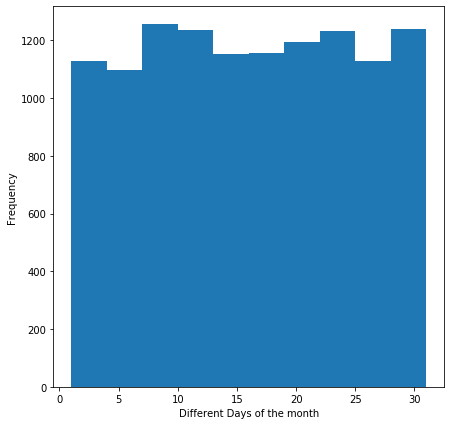

In [158]:
#Histogram Plot of day Column
plt.figure(figsize=(7,7))
plt.hist(df_train['day'],bins=10)
plt.xlabel('Different Days of the month')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

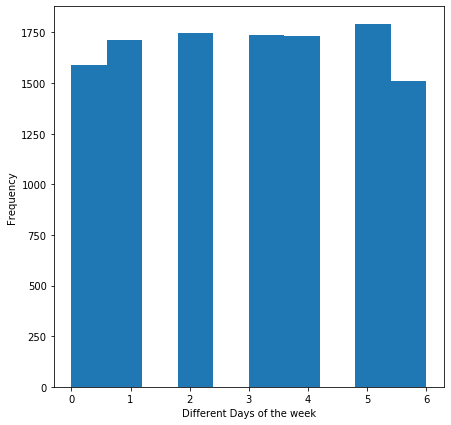

In [159]:
#Histogram Plot of weekday Column
plt.figure(figsize=(7,7))
plt.hist(df_train['weekday'],bins=10)
plt.xlabel('Different Days of the week')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

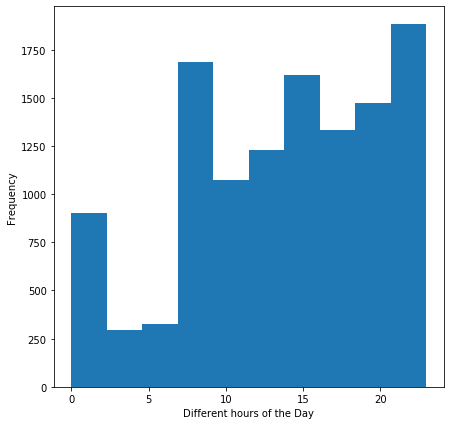

In [160]:
plt.figure(figsize=(7,7))
plt.hist(df_train['hour'],bins=10)
plt.xlabel('Different hours of the Day')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

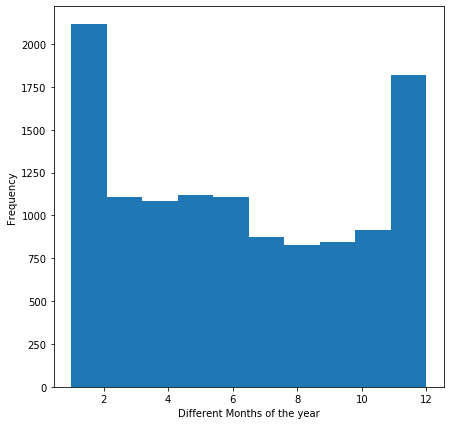

In [161]:
#Histogram Plot of month Column
plt.figure(figsize=(7,7))
plt.hist(df_train['month'],bins=10)
plt.xlabel('Different Months of the year')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

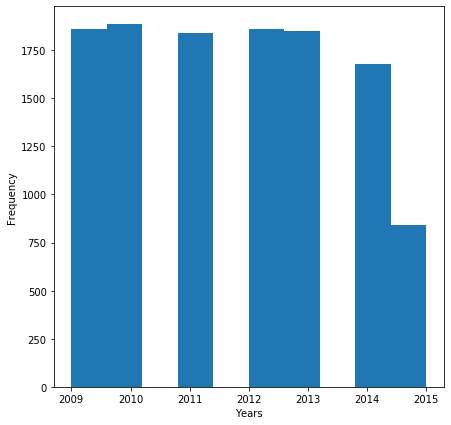

In [162]:
#Histogram Plot of year Column
plt.figure(figsize=(7,7))
plt.hist(df_train['year'],bins=10)
plt.xlabel('Years')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

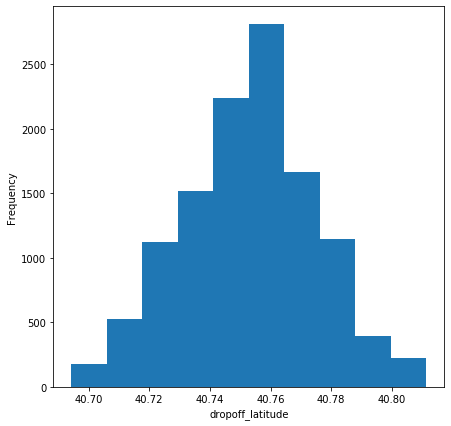

In [163]:
#Histogram Plot of dropoff_latitude Column
plt.figure(figsize=(7,7))
plt.hist(df_train['dropoff_latitude'])
plt.xlabel('dropoff_latitude')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

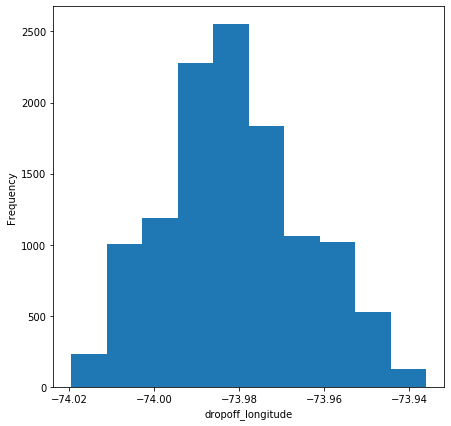

In [164]:
#Histogram Plot of dropoff_longitude Column
plt.figure(figsize=(7,7))
plt.hist(df_train['dropoff_longitude'])
plt.xlabel('dropoff_longitude')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

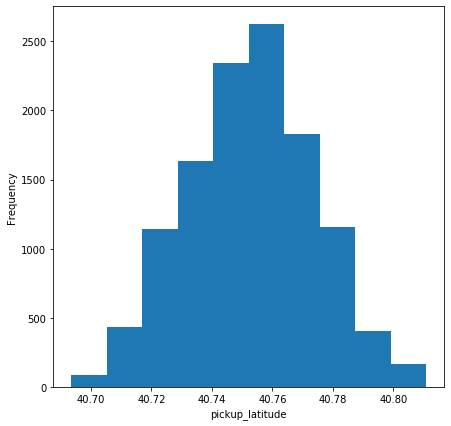

In [165]:
#Histogram Plot of pickup_latitude Column
plt.figure(figsize=(7,7))
plt.hist(df_train['pickup_latitude'])
plt.xlabel('pickup_latitude')
plt.ylabel('Frequency')

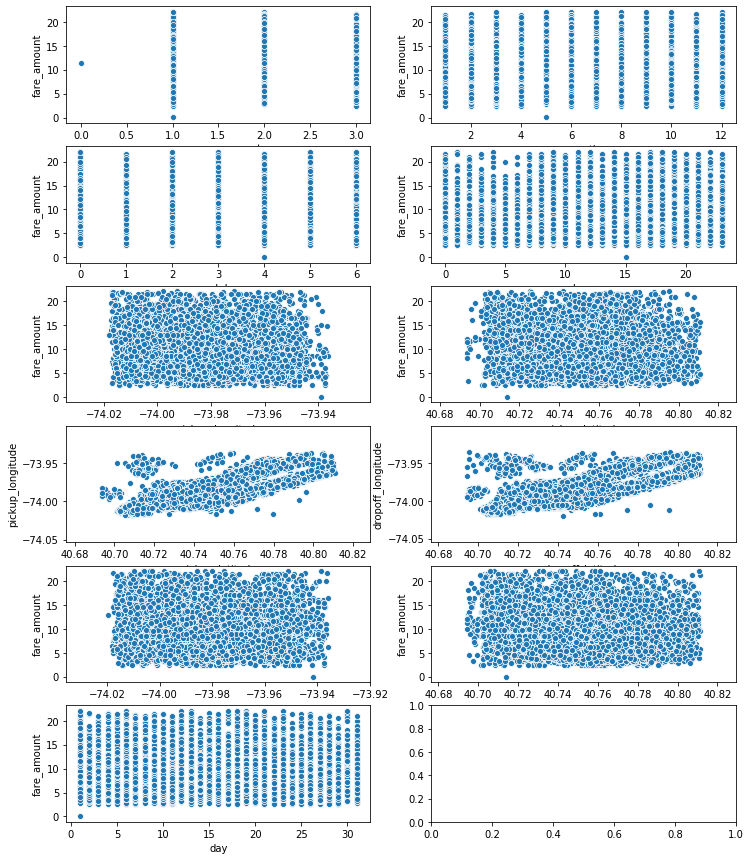

In [166]:
#################Scatter plot########################

fig,x = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(12,15)

sns.scatterplot(x="passenger_count", y="fare_amount", data= df_train, palette="Set2",ax=x[0][0])
sns.scatterplot(x="month", y="fare_amount", data= df_train, palette="Set2",ax=x[0][1])
sns.scatterplot(x="weekday", y="fare_amount", data= df_train, palette="Set2",ax=x[1][0])
sns.scatterplot(x="hour", y="fare_amount", data= df_train, palette="Set2",ax=x[1][1])
sns.scatterplot(x="pickup_longitude", y="fare_amount", data= df_train, palette="Set2",ax=x[2][0])
sns.scatterplot(x="pickup_latitude", y="fare_amount", data= df_train, palette="Set2",ax=x[2][1])
sns.scatterplot(x="pickup_latitude", y="pickup_longitude", data= df_train, palette="Set2",ax=x[3][0])
sns.scatterplot(x="dropoff_latitude", y="dropoff_longitude", data= df_train, palette="Set2",ax=x[3][1])
sns.scatterplot(x="dropoff_longitude", y="fare_amount", data= df_train, palette="Set2",ax=x[4][0])
sns.scatterplot(x="dropoff_latitude", y="fare_amount", data= df_train, palette="Set2",ax=x[4][1])
sns.scatterplot(x="day", y="fare_amount", data= df_train, palette="Set2",ax=x[5][0])


## Feature Selection

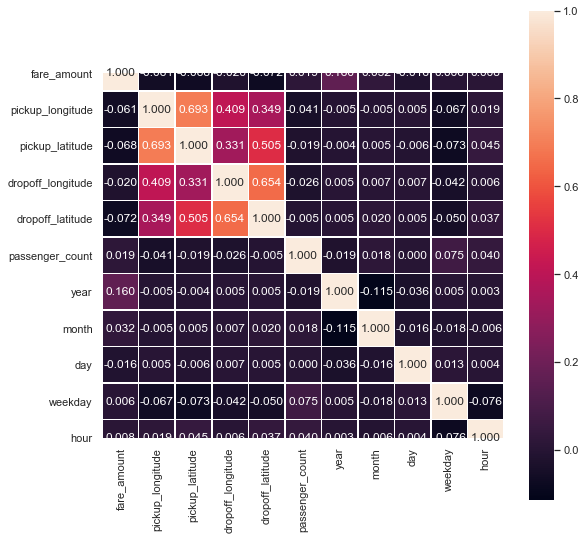

In [167]:
#Correlation Analysis

def Correlation(df):
    df_corr = df.loc[:,df.columns]
    corr = df_corr.corr()
    sns.set()
    plt.figure(figsize=(9,9))
    sns.heatmap(corr,annot= True,fmt = ".3f",square=True,linewidths = 0.5)
    
Correlation(df_train)

In [168]:
######Splitting Dataset into train and test #########

train,test = train_test_split(df_train,test_size=0.2,random_state = 121
                             )
X_train = train.iloc[:,1:11]
Y_train = train.iloc[:,0]
X_test = test.iloc[:,1:11]
Y_test = test.iloc[:,0]
print(X_train.head())

       pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
2310         -73.981842        40.740663         -73.985907         40.760040   
13172        -74.007760        40.740697         -73.990780         40.718512   
14301        -73.963292        40.768951         -73.976478         40.735943   
5489         -73.954500        40.774200         -73.982300         40.768300   
11087        -73.994401        40.722785         -73.951459         40.713218   

       passenger_count  year  month  day  weekday  hour  
2310                 2  2014     11   15        5     1  
13172                2  2014      8    3        6     3  
14301                1  2010      7   11        6    19  
5489                 2  2011     12   29        3    19  
11087                1  2012      8   30        3     0  


## Feature Scaling

In [169]:
#Normalisation

def Normalisation(df):
    for i in df.columns:
        print(i)
        df[i] = (df[i] - df[i].min())/(df[i].max() - df[i].min())

Normalisation(X_train)
Normalisation(X_test)
print(X_train.head(10))

pickup_longitude
pickup_latitude
dropoff_longitude
dropoff_latitude
passenger_count
year
month
day
weekday
hour
pickup_longitude
pickup_latitude
dropoff_longitude
dropoff_latitude
passenger_count
year
month
day
weekday
hour
       pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
2310           0.444229         0.401839           0.391156          0.561638   
13172          0.126755         0.402129           0.331824          0.207069   
14301          0.671452         0.642879           0.505960          0.355896   
5489           0.779147         0.687605           0.435073          0.632162   
11087          0.290392         0.249502           0.810583          0.161868   
3608           0.342500         0.407880           0.320744          0.463920   
11305          0.440187         0.624397           0.215424          0.328326   
9810           0.542811         0.471370           0.420036          0.278165   
3453           0.141270         0.427521       

## Model Developement

## Defining Error Metrics

In [170]:
#MAPE

def MAPE(y_true, y_pred):
    MAE = np.mean(np.abs((y_true - y_pred)))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    print("MAE is:", MAE)
    print("MAPE is:", mape)
    return mape

In [171]:
#RMSE

def RMSE(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    rmse = np.sqrt(mse)
    print("MSE: ",mse)
    print("RMSE: ",rmse)
    return rmse
    

## Linear Regression

In [172]:


LR_model = sm.OLS(train.iloc[:,0],train.iloc[:,1:]).fit()


In [173]:
print(LR_model.summary())

                                 OLS Regression Results                                
Dep. Variable:            fare_amount   R-squared (uncentered):                   0.842
Model:                            OLS   Adj. R-squared (uncentered):              0.842
Method:                 Least Squares   F-statistic:                              5025.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        17:03:50   Log-Likelihood:                         -25878.
No. Observations:                9452   AIC:                                  5.178e+04
Df Residuals:                    9442   BIC:                                  5.185e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [174]:
#Prediction
LR_model_predict = LR_model.predict(test.iloc[:,1:])

In [175]:
#Model Evaluation

# df_Result['MAPE'] = 
# df_Result['RMSE'] = 

MAPE(Y_test,LR_model_predict)
RMSE(Y_test,LR_model_predict)
# MAE is: 2.973392366538636
# MAPE is: 0.41842477657562493
# MSE:  14.442326262657845
# RMSE:  3.800306074865266


MAE is: 2.973392366538636
MAPE is: 0.41842477657562493
MSE:  14.442326262657845
RMSE:  3.800306074865266


3.800306074865266

## KNN 

In [176]:
KNN_model = KNeighborsRegressor(n_neighbors=50).fit(X_train,Y_train)

#Predict
KNN_model_predict = KNN_model.predict(X_test)

In [177]:
#Model Evaluation
MAPE(Y_test,KNN_model_predict)
RMSE(Y_test,KNN_model_predict)

# MAE is: 2.452239522175146
# MAPE is: 0.3198996671035521
# MSE:  10.642973863374007
# RMSE:  3.262357102368471

MAE is: 2.452239522175146
MAPE is: 0.3198996671035521
MSE:  10.642973863374007
RMSE:  3.262357102368471


3.262357102368471

## Decision Tree

In [178]:

DT_model = DecisionTreeRegressor(random_state=123).fit(train.iloc[:,1:],train.iloc[:,0])
DT_model_predict = DT_model.predict(test.iloc[:,1:])

In [179]:
#Model Evaluation
MAPE(Y_test,DT_model_predict)
RMSE(Y_test,DT_model_predict)


# MAE is: 2.279578587009114
# MAPE is: 0.2959167425706746
# MSE:  9.514700357563429
# RMSE:  3.0845907925628366

MAE is: 2.279578587009114
MAPE is: 0.2959167425706746
MSE:  9.514700357563429
RMSE:  3.0845907925628366


3.0845907925628366

## Random Forest


In [180]:
RF_model = RandomForestRegressor(max_features='auto',n_estimators=500,max_depth = 8).fit(train.iloc[:,1:],train.iloc[:,0])
RF_model_predict = RF_model.predict(test.iloc[:,1:])

In [181]:
#Model Evaluation
MAPE(Y_test,RF_model_predict)
RMSE(Y_test,RF_model_predict)

# MAE is: 2.1770230876697245
# MAPE is: 0.31314930719311923
# MSE:  8.012735122578105
# RMSE:  2.8306775023972803


MAE is: 2.1826303444054203
MAPE is: 0.3139208472395061
MSE:  8.038745962542796
RMSE:  2.835268234672479


2.835268234672479

In [182]:
df_Result = pd.DataFrame({'Model':["Linear Regression","KNN","Decision Tree","Random Forest"],
                           'MAPE':["0.41842477657562493","0.3198996671035521","0.2959167425706746","0.31314930719311923"],
                            'RMSE':["3.800306074865266","3.262357102368471","3.0845907925628366","2.8306775023972803"]})

df_Result = df_Result[['Model','MAPE','RMSE']]
df_Result.sort_values('RMSE',ascending =True)

,Model,MAPE,RMSE
3,Random Forest,0.31314930719311923,2.8306775023972803
2,Decision Tree,0.2959167425706746,3.0845907925628366
1,KNN,0.3198996671035521,3.262357102368471
0,Linear Regression,0.41842477657562493,3.800306074865266


In [183]:
##Random Forest has lowest RMSE Value than other model.
## So we will freeze Random forest model for our prediction on test data

## Testing of Model on test data

In [184]:
#Loading test dataset
df_test = pd.read_csv("test.csv")

In [185]:
df_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [186]:
#After checking test data we limit data into a range
df_test = df_test[((df_test['pickup_longitude'] > -79) & (df_test['pickup_longitude'] < -70)) & 
           ((df_test['dropoff_longitude'] > -79) & (df_test['dropoff_longitude'] < -70)) & 
           ((df_test['pickup_latitude'] > 36) & (df_test['pickup_latitude'] < 45)) & 
           ((df_test['dropoff_latitude'] > 36) & (df_test['dropoff_latitude'] < 45)) & 
           (df_test['passenger_count'] > 0) ]



In [187]:
## splitting datetime data into different columns and removing pickup_datetime column
date_time_split(df_test)
df_test.drop('pickup_datetime',axis= 1,inplace=True)
print(df_test.isnull().sum())


pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
day                  0
weekday              0
hour                 0
dtype: int64


In [188]:
df_test.dtypes

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
year                   int64
month                  int64
day                    int64
weekday                int64
hour                   int64
dtype: object

In [189]:
## Using previously trained model of random forest for prediction on test data
rf_trained_model = RF_model.predict(df_test)

In [190]:
rf_trained_model = pd.DataFrame(rf_trained_model,columns = ["fare_amount"])

In [191]:
##saving the result into local machine
rf_trained_model.to_csv("Test_data_predictions.csv",index=False)